<a href="https://colab.research.google.com/github/YangHyunu/SKT-FLY-AI-5/blob/main/2%EC%A3%BC%EC%B0%A8/18_cnn_binary_cats_dogs_%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN 이진분류 (컬러 이미지)
- 개와 고양이 데이터셋

In [ ]:
!pip install --q ipython-autotime
%load_ext autotime

time: 323 µs (started: 2024-07-01 06:34:15 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import tensorflow as tf
import keras

time: 14.4 s (started: 2024-07-01 06:34:15 +00:00)


## 1.데이터 준비

In [ ]:
# !gdown  https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR

time: 710 µs (started: 2024-07-01 06:34:29 +00:00)


In [ ]:
# ! unzip /content/cats_and_dogs.zip # 압축해제


time: 251 µs (started: 2024-07-01 06:34:29 +00:00)


In [ ]:
data_root ='/content/cats_and_dogs'
train_dir =data_root + '/train'
test_dir = data_root + '/test'

print(train_dir)
print(test_dir)

/content/cats_and_dogs/train
/content/cats_and_dogs/test
time: 4.45 ms (started: 2024-07-01 06:34:29 +00:00)


## 2. 데이터 로딩  (수동으로)

In [ ]:
class_name = ['cats','dogs']

time: 671 µs (started: 2024-07-01 06:34:29 +00:00)


In [ ]:
import os

train_cats_fnames=os.listdir(train_dir + '/cats')
train_dogs_fnames=os.listdir(train_dir + '/dogs')

time: 7.53 ms (started: 2024-07-01 06:34:29 +00:00)


In [ ]:
import PIL
X_train =[]
y_train =[]

for fname in train_cats_fnames:
  image = PIL.Image.open(train_dir + '/cats/'+fname) # 이미지 읽기
  image= image.resize((224,224)) # 이미지 리사이즈
  arr= np.array(image) # 이미지를 numpy 배열로 변환
  X_train.append(arr)
  y_train.append(0) # 고양이는 0 , class_name = ['cats','dogs']

len(X_train), len(y_train)

(1300, 1300)

time: 9.61 s (started: 2024-07-01 06:34:29 +00:00)


In [ ]:
for fname in train_dogs_fnames:
  image = PIL.Image.open(train_dir + '/dogs/'+fname) # 이미지 읽기
  image= image.resize((224,224)) # 이미지 리사이즈
  arr= np.array(image) # 이미지를 numpy 배열로 변환
  X_train.append(arr)
  y_train.append(1) # 개는 1 , class_name = ['cats','dogs']

len(X_train), len(y_train)

(2600, 2600)

time: 13.2 s (started: 2024-07-01 06:34:39 +00:00)


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
print(type(X_train),type(y_train))
print(X_train.shape, y_train.shape) # 컬러라 차원이 3 흑백은 없거나 1

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2600, 224, 224, 3) (2600,)
time: 273 ms (started: 2024-07-01 06:34:52 +00:00)


## 3. 학습 , 검증 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid= train_test_split(X_train,y_train,test_size=0.2
                                                  ,random_state=42
                                                  ,shuffle=True)

print(X_train.shape,X_valid.shape)
print(y_train.shape,y_valid.shape)


(2080, 224, 224, 3) (520, 224, 224, 3)
(2080,) (520,)
time: 1.61 s (started: 2024-07-01 06:34:52 +00:00)


array([[[ 78,  79,  74],
        [ 78,  79,  74],
        [ 79,  80,  75],
        ...,
        [103, 105, 100],
        [102, 104,  99],
        [102, 104,  99]],

       [[ 78,  79,  74],
        [ 78,  79,  74],
        [ 79,  80,  75],
        ...,
        [105, 106, 101],
        [104, 105, 100],
        [103, 104,  99]],

       [[ 78,  79,  74],
        [ 78,  79,  74],
        [ 79,  80,  75],
        ...,
        [106, 107, 102],
        [105, 106, 101],
        [105, 105, 100]],

       ...,

       [[ 37,  43,  33],
        [ 37,  43,  33],
        [ 39,  45,  33],
        ...,
        [ 45,  49,  50],
        [ 42,  46,  47],
        [ 41,  45,  46]],

       [[ 40,  44,  37],
        [ 41,  46,  36],
        [ 43,  47,  36],
        ...,
        [ 45,  49,  50],
        [ 45,  50,  51],
        [ 45,  49,  51]],

       [[ 40,  43,  37],
        [ 43,  45,  39],
        [ 46,  48,  39],
        ...,
        [ 49,  51,  52],
        [ 48,  53,  55],
        [ 47,  52,  55]]], dtype=uint8)
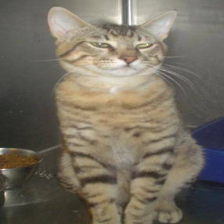

time: 35.2 ms (started: 2024-07-01 06:34:54 +00:00)


In [ ]:
X_train[0]

In [ ]:
np.random.seed(42)
sample = np.random.randint(2080,size=25)
sample # 2080개의 데이터 중 25 가지 뽑인 INDEX값을 가짐

array([ 860, 1294, 1130, 1095, 1638,  466, 1238,  330, 1482,  130, 1685,
        769, 1515, 1215,  955, 1184,  459,   21,  747,  474, 1082, 2047,
        975, 1806,  189])

time: 20.5 ms (started: 2024-07-01 06:34:54 +00:00)


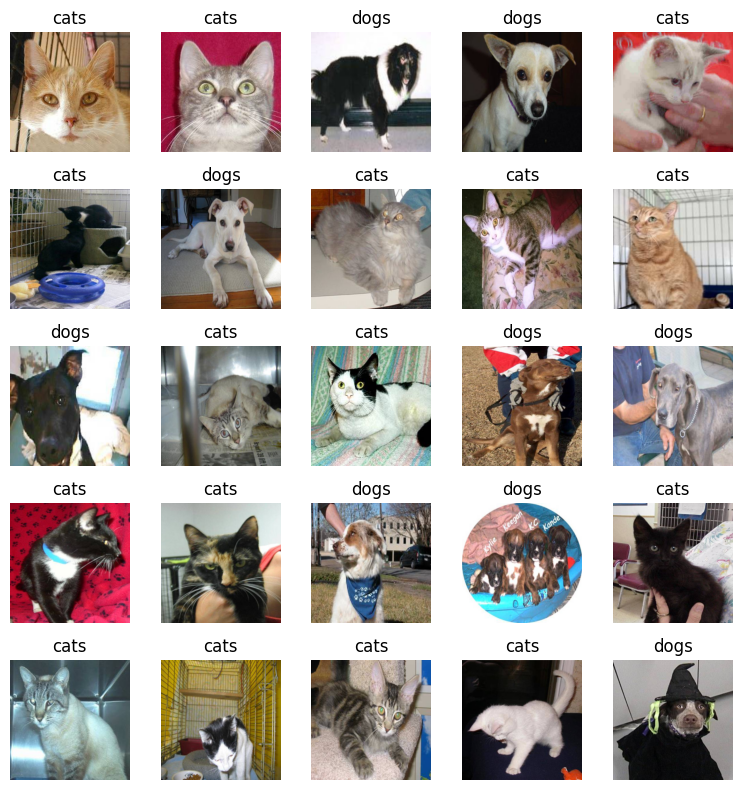

time: 7.01 s (started: 2024-07-01 06:34:54 +00:00)


In [ ]:
plt.figure(figsize=(8,8))
for i, idx in enumerate(sample):
  plt.subplot(5, 5,i+1) # 25개 grid
  plt.imshow(X_train[idx],cmap='gray')
  plt.title(class_name[y_train[idx]]) # 정답값 표시
  plt.axis('off')
  plt.tight_layout()
plt.show()

## 4. 전처리
  - 스케일링
  - 원-핫 인코딩 X (이진 분류 라서 안해도 됨)

In [ ]:
X_train_s = X_train.astype('float')/255.
X_valid_s = X_valid.astype('float')/255.


time: 1.24 s (started: 2024-07-01 06:35:01 +00:00)


## 5. 모델(전이학습)

In [ ]:
X_train_s.shape

(2080, 224, 224, 3)

time: 3.25 ms (started: 2024-07-01 06:35:02 +00:00)


In [ ]:
from keras.applications import VGG16
base_model = VGG16(
    include_top=False,
    weights="imagenet"
    ,input_shape=( 224, 224, 3))
base_model.trainable = False # base_model을 학습시킬건지 여부
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

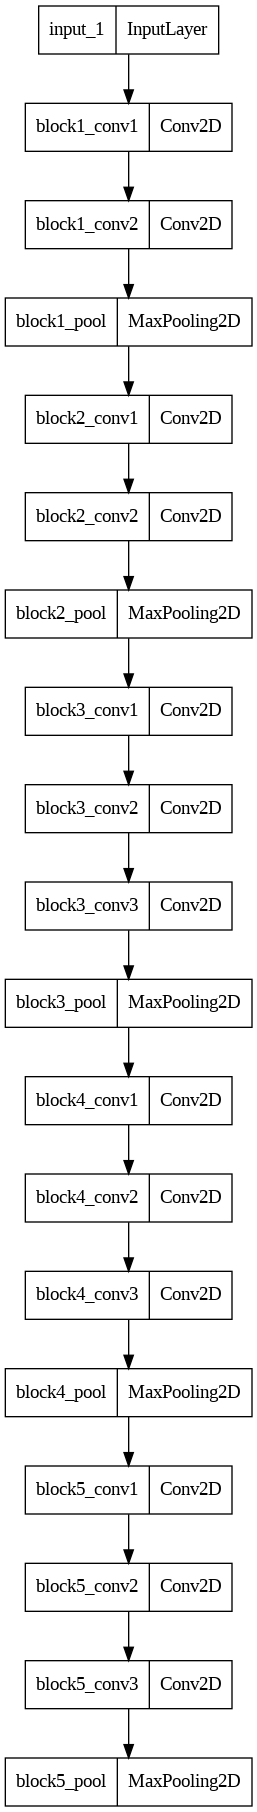

time: 325 ms (started: 2024-07-01 06:35:04 +00:00)


In [ ]:
keras.utils.plot_model(base_model) # model summary()에서 학습시킬 수 없는 param = 전체 param b/c trainable False

- 마지막 분류부분만 직접 모델링

In [ ]:
from keras import layers
model = keras.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               1

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

time: 43 ms (started: 2024-07-01 06:35:04 +00:00)


- Early Stopping & Model Checkpoint

  -Model Checkpoint 특정 조건을 만족하면 모델을 저장
   
  -save_best_only=True 학습 후 최고의 모델만 저장  
  -save_weight_only = True weight만 저장

In [ ]:
from keras import callbacks
es = callbacks.EarlyStopping(
    monitor='val_loss',patience=5)
ckpt_path='/temp/cats_dogs.ckpt'
ckpt = callbacks.ModelCheckpoint(
    filepath=ckpt_path,
    monitor='val_loss',
    save_weight_only=True,
    save_best_only=True)

time: 721 µs (started: 2024-07-01 06:35:04 +00:00)


In [ ]:
EPOCHS= 10
BATCH_SIZE= 32
history = model.fit(X_train_s, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=[es, ckpt],
                    validation_data=(X_valid_s, y_valid)) # Pass validation data as a tuple (features, labels)
                    # epoch 가 한번 끝날 때 마다 callback, model checkpoint 호출

Epoch 1/10
65/65 [==============================] - 34s 345ms/step - loss: 0.9854 - accuracy: 0.6620 - val_loss: 0.2656 - val_accuracy: 0.8769
Epoch 2/10
65/65 [==============================] - 16s 251ms/step - loss: 0.2856 - accuracy: 0.8736 - val_loss: 0.2136 - val_accuracy: 0.9212
Epoch 3/10
65/65 [==============================] - 11s 161ms/step - loss: 0.2023 - accuracy: 0.9173 - val_loss: 0.3406 - val_accuracy: 0.8404
Epoch 4/10
65/65 [==============================] - 26s 411ms/step - loss: 0.1646 - accuracy: 0.9288 - val_loss: 0.1893 - val_accuracy: 0.9269
Epoch 5/10
65/65 [==============================] - 11s 173ms/step - loss: 0.1398 - accuracy: 0.9418 - val_loss: 0.1971 - val_accuracy: 0.9308
Epoch 6/10
65/65 [==============================] - 21s 325ms/step - loss: 0.0979 - accuracy: 0.9611 - val_loss: 0.1887 - val_accuracy: 0.9308
Epoch 7/10
65/65 [==============================] - 11s 175ms/step - loss: 0.0813 - accuracy: 0.9678 - val_loss: 0.2085 - val_accuracy: 0.9308

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

time: 1.21 ms (started: 2024-07-01 06:38:38 +00:00)


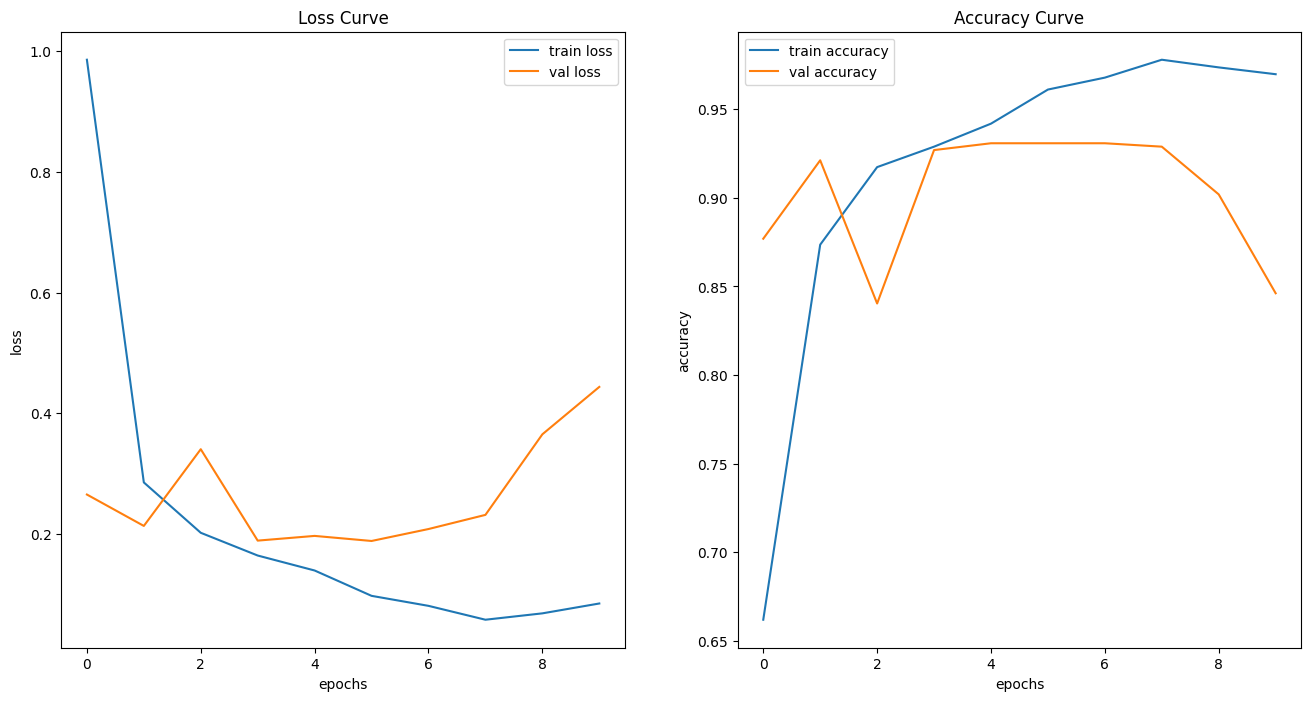

time: 453 ms (started: 2024-07-01 06:38:38 +00:00)


In [ ]:
plot_history(history)

In [ ]:
model.load_weights(ckpt_path)  # 데이터 불러오기

time: 465 ms (started: 2024-07-01 06:38:44 +00:00)


## 6.평가

In [ ]:
# 테스트 데이터 전처리
# 평가

time: 256 µs (started: 2024-07-01 06:38:45 +00:00)


In [ ]:
test_cats_fnames=os.listdir(test_dir + '/cats')
test_dogs_fnames=os.listdir(test_dir + '/dogs')

time: 2.15 ms (started: 2024-07-01 06:38:46 +00:00)


In [ ]:
X_test =[]
y_test =[]

for fname in test_cats_fnames:
  image = PIL.Image.open(test_dir + '/cats/'+fname) # 이미지 읽기
  image= image.resize((224,224)) # 이미지 리사이즈
  arr= np.array(image) # 이미지를 numpy 배열로 변환
  X_test.append(arr)
  y_test.append(0) # 고양이는 0 , class_name = ['cats','dogs']

len(X_test), len(y_test)

(200, 200)

time: 767 ms (started: 2024-07-01 06:38:48 +00:00)


In [ ]:
for fname in test_dogs_fnames:
  image = PIL.Image.open(test_dir + '/dogs/'+fname) # 이미지 읽기
  image= image.resize((224,224)) # 이미지 리사이즈
  arr= np.array(image) # 이미지를 numpy 배열로 변환
  X_test.append(arr)
  y_test.append(1) # 개는 1 , class_name = ['cats','dogs']

len(X_test), len(y_test)

(400, 400)

time: 784 ms (started: 2024-07-01 06:38:48 +00:00)


In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)
print(type(X_test),type(y_test))
print(X_test.shape, y_test.shape) # 컬러라 차원이 3 흑백은 없거나 1

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(400, 224, 224, 3) (400,)
time: 41.7 ms (started: 2024-07-01 06:42:12 +00:00)


#

time: 775 ms (started: 2024-07-01 06:40:43 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true,y_pred,aver='binary'):
  print('accuracy',accuracy_score(y_true,y_pred))
  print('recall',recall_score(y_true,y_pred,average=aver))
  print('precision',precision_score(y_true,y_pred,average=aver))
  print('f1_score',f1_score(y_true,y_pred, average=aver))

  cfm = confusion_matrix(y_true,y_pred)
  s = sns.heatmap(cfm,annot=True,cmap='Blues',fmt='d',cbar=False)
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()

time: 8.23 ms (started: 2024-07-01 06:42:17 +00:00)


In [ ]:
y_pred = model.predict(X_test_s)

13/13 [==============================] - 2s 131ms/step
time: 4.32 s (started: 2024-07-01 06:42:17 +00:00)


In [ ]:
y_pred = np.argmax(y_pred,axis=1)
y_pred[:5]

array([0, 0, 0, 0, 0])

time: 7.71 ms (started: 2024-07-01 06:42:25 +00:00)


In [ ]:
import seaborn as sns

time: 266 ms (started: 2024-07-01 06:42:56 +00:00)


accuracy 0.5
recall 0.0
precision 0.0
f1_score 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


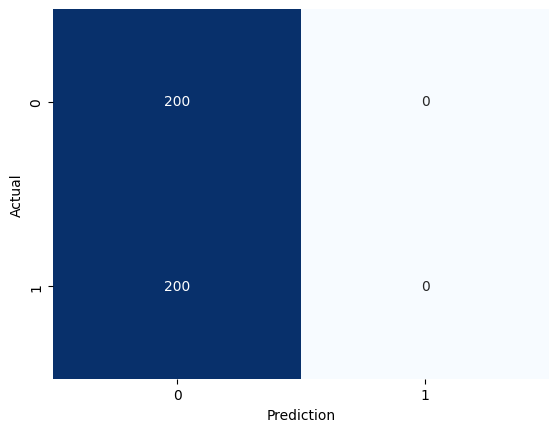

time: 216 ms (started: 2024-07-01 06:42:58 +00:00)


In [ ]:
print_metrics(y_test,y_pred)

In [ ]:
X_test.shape

In [ ]:
sample = np.random.randint(10000,size=25)

time: 672 µs (started: 2024-07-01 06:41:08 +00:00)


IndexError: index 2734 is out of bounds for axis 0 with size 400

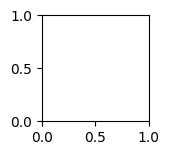

time: 283 ms (started: 2024-07-01 06:43:57 +00:00)


In [ ]:
plt.figure(figsize=(8,8))
for i, idx in enumerate(sample):
  plt.subplot(5, 5,i+1) # 25개 grid
  plt.imshow(X_test[idx],cmap='gray')
  plt.title(f'pred:({y_pred[idx]}) ({y_test[idx]})') # 정답값 표시
  plt.axis('off')
  plt.tight_layout()
plt.show()


In [ ]:
test_Potato___Late_blight_fnames=os.listdir('/content/PlantVillage/Potato___Late_blight')
test_Potato___healthy_fnames=os.listdir('/content/PlantVillage/Potato___healthy')
test_Potato___Early_blight_fnames=os.listdir('/content/PlantVillage/Potato___Early_blight')


In [ ]:
import PIL
X_test =[]
y_test =[]

for fname in test_Potato___Late_blight_fnames:
  image = PIL.Image.open('/content/PlantVillage/Potato___Late_blight/'+fname) # 이미지 읽기
  image= image.resize((224,224)) # 이미지 리사이즈
  arr= np.array(image) # 이미지를 numpy 배열로 변환
  X_test.append(arr)
  y_test.append(0)

len(X_test), len(y_test)

In [ ]:
for fname in test_Potato___healthy_fnames:
  image = PIL.Image.open('/content/PlantVillage/Potato___healthy/'+fname) # 이미지 읽기
  image= image.resize((224,224)) # 이미지 리사이즈
  arr= np.array(image) # 이미지를 numpy 배열로 변환
  X_test.append(arr)
  y_test.append(1)

len(X_test), len(y_test)

In [ ]:
for fname in test_Potato___Early_blight_fnames:
  image = PIL.Image.open('/content/PlantVillage/Potato___Early_blight/'+fname) # 이미지 읽기
  image= image.resize((224,224)) # 이미지 리사이즈
  arr= np.array(image) # 이미지를 numpy 배열로 변환
  X_test.append(arr)
  y_test.append(2)

len(X_test), len(y_test)

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)
print(type(X_test),type(y_test))
print(X_test.shape, y_test.shape) # 컬러라 차원이 3 흑백은 없거나 1